In [1]:
import numpy as np
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from PIL import Image
import random
import math
import matplotlib.pyplot as plt
import dendropy
import csv
from dendropy.calculate import treecompare
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

Using TensorFlow backend.


In [2]:
whole_data = np.load('../../Data_Preprocessing/output/5000_Dataset/training_data.npy')
whole_labels_cub = np.load('../../Data_Preprocessing/output/5000_Dataset/training_dists_cub.npy')
whole_labels_flatten = np.load('../../Data_Preprocessing/output/5000_Dataset/training_dists_flatten.npy')

In [3]:
BRANCH_NUM = 100
SEQUENCE_LEN = 1000

OUTPUT_DIST_NUM = int((BRANCH_NUM - 1) * BRANCH_NUM / 2)

In [4]:
print(whole_data.shape)
print(whole_labels_cub.shape)
print(whole_labels_flatten.shape)

(5174, 100, 1000, 1)
(5174, 100, 100, 1)
(5174, 4950)


In [5]:
X_train = np.load('./output/X_train.npy')
Y_train_flatten = np.load('./output/Y_train_flatten.npy')

X_test = np.load('./output/X_test.npy')
Y_test_flatten = np.load('./output/Y_test_flatten.npy')

In [6]:
print(X_train.shape)
print(Y_train_flatten.shape)
print(X_test.shape)
print(Y_test_flatten.shape)

(4397, 100, 1000, 1)
(4397, 4950)
(777, 100, 1000, 1)
(777, 4950)


## Before shuffle
#### 5147 * 100 * 1000
![](https://i.imgur.com/1hssZY1.png)

## After shuffle (100 & 1000)
#### 5147 * 100 * 1000
![](https://i.imgur.com/UmDMTGN.png)

## Shuffle (5147) X_train
#### 5147 * 100 * 1000
![](https://i.imgur.com/NCtoAu6.png)

## Shuffle (5147) X_test
#### 5147 * 100 * 1000
![](https://i.imgur.com/YCHqnap.png)

## Load the Model

In [7]:
model = keras.models.load_model('./output/CNN_model.h5')

In [8]:
loss_list_epoch= np.load('./output/loss_list_epoch.npy')
RF_avg_distance_epoch = np.load('./output/RF_avg_distance_epoch.npy')
RF_list_distance_epoch = np.load('./output/RF_list_distance_epoch.npy')

In [9]:
train_result = model.evaluate(X_train, Y_train_flatten)
test_result = model.evaluate(X_test, Y_test_flatten)
print("Train Acc: ", train_result)
print("Test Acc: ", test_result)

777/777 [==============================] - 1s 1ms/step
Train Acc:  [0.002554413014444636, 0.017739368602633476]
Test Acc:  [0.004971155933939889, 0.0038610037881881]


## X_train plot

In [10]:
X_train_results = model.predict(X_train)

In [11]:
train_show_index = 200

<function matplotlib.pyplot.show(*args, **kw)>

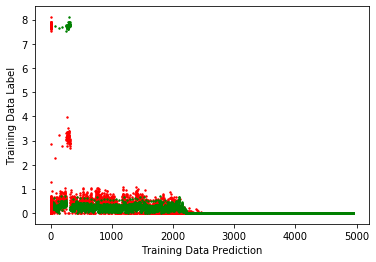

In [12]:
plt.scatter(range(X_train_results[train_show_index].shape[0]), X_train_results[train_show_index], c='r', s = 2)
plt.scatter(range(Y_train_flatten[train_show_index].shape[0]), Y_train_flatten[train_show_index], c='g', s = 2)
plt.xlabel ('Flatten Distance Matrix Index')
plt.ylabel ('Distance Matrix Value')

plt.scatter(X_train_results[train_show_index], Y_train_flatten[train_show_index], c='r', s = 2)
plt.xlabel ('Training Data Prediction')
plt.ylabel ('Training Data Label')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

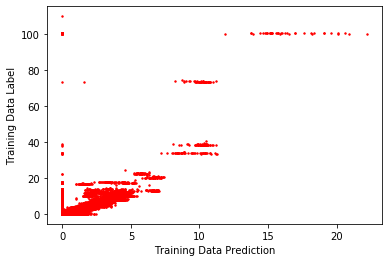

In [13]:
X_train_results_resh= X_train_results.reshape((1, 4397*OUTPUT_DIST_NUM))
Y_train_resh = Y_train_flatten.reshape((1, 4397*OUTPUT_DIST_NUM))

plt.scatter(X_train_results_resh, Y_train_resh, c='r', s = 2)
plt.xlabel ('Training Data Prediction')
plt.ylabel ('Training Data Label')
plt.show

## X_test plot

In [14]:
X_test_results = model.predict(X_test)

In [15]:
test_show_index = 10

<function matplotlib.pyplot.show(*args, **kw)>

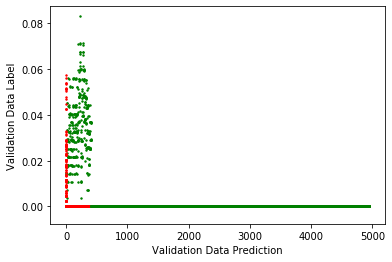

In [16]:
plt.scatter(range(X_test_results[test_show_index].shape[0]), X_test_results[test_show_index], c='r', s = 2)
plt.scatter(range(Y_test_flatten[test_show_index].shape[0]), Y_test_flatten[test_show_index], c='g', s = 2)
plt.xlabel ('Flatten Distance Matrix Index')
plt.ylabel ('Distance Matrix Value')

plt.scatter(X_test_results[train_show_index], Y_test_flatten[train_show_index], c='r', s = 2)
plt.xlabel ('Validation Data Prediction')
plt.ylabel ('Validation Data Label')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

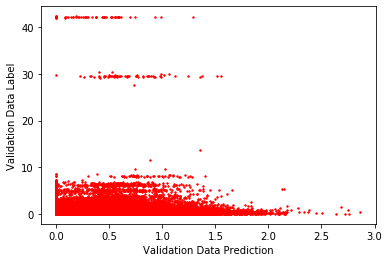

In [17]:
X_test_results_resh= X_test_results.reshape((1, 777*OUTPUT_DIST_NUM))
Y_test_resh = Y_test_flatten.reshape((1, 777*OUTPUT_DIST_NUM))

plt.scatter(X_test_results_resh, Y_test_resh, c='r', s = 2)
plt.xlabel ('Validation Data Prediction')
plt.ylabel ('Validation Data Label')
plt.show

## Plot Loss 

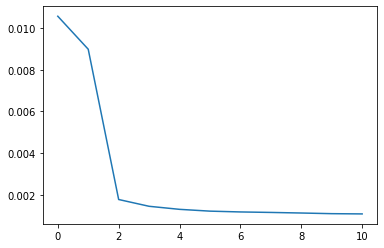

In [18]:
plt.plot(loss_list_epoch)
plt.show()

## Plot RF distance

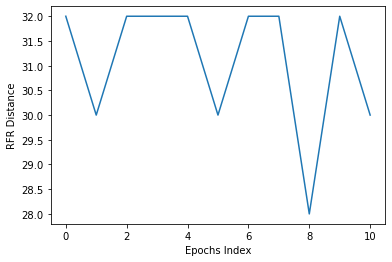

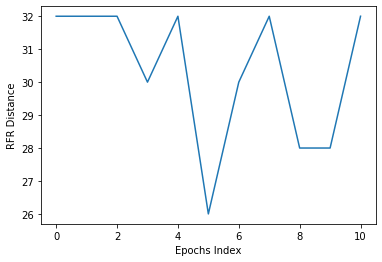

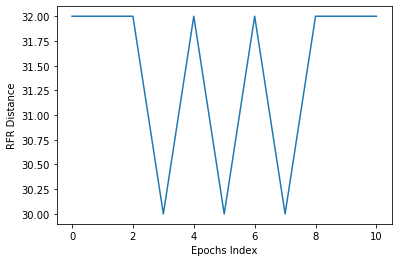

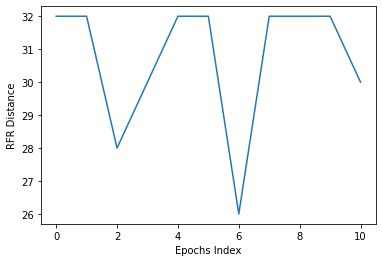

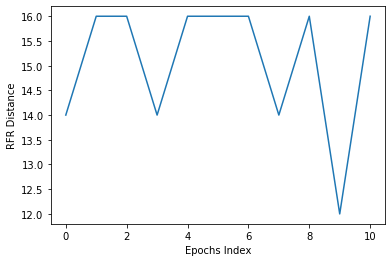

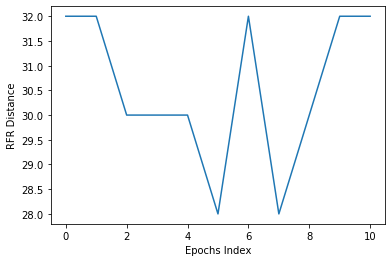

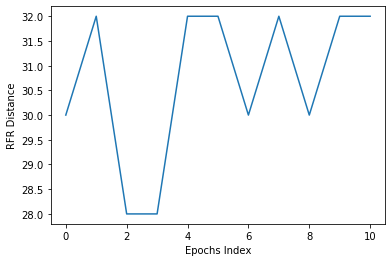

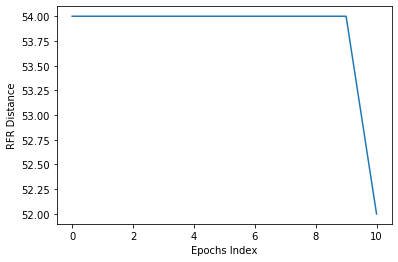

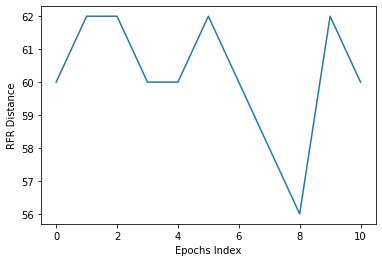

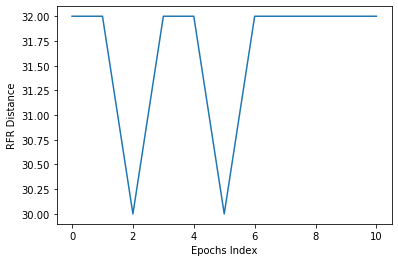

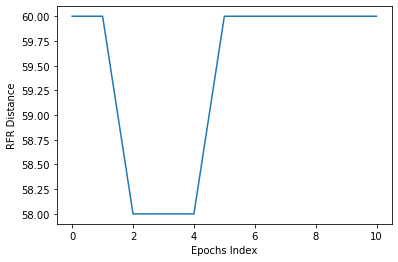

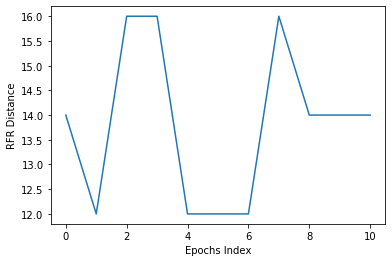

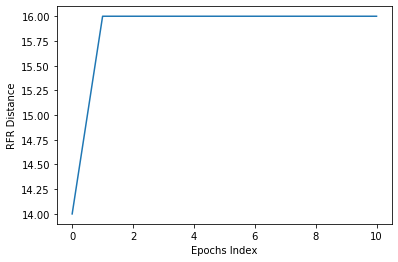

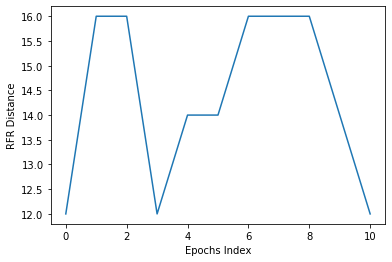

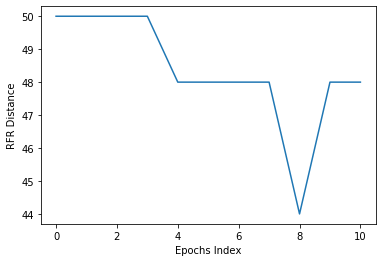

In [19]:
for index in range(15):
    index_RF_dist = [each[index] for each in RF_list_distance_epoch]
    plt.plot(index_RF_dist)
    plt.xlabel ('Epochs Index')
    plt.ylabel ('RFR Distance')
    plt.show()

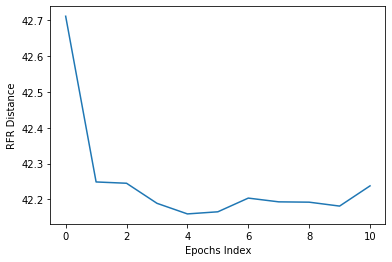

In [20]:
plt.plot(RF_avg_distance_epoch)
plt.xlabel ('Epochs Index')
plt.ylabel ('RFR Distance')
plt.show()